# STOCK PRICE PREDICTION USING FBPROPHET

In [1]:
import sys
print (sys.version)
print(sys.executable)

3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
C:\Users\akash\anaconda3\python.exe


## 1. Federal Bank

### Importing Libraries

In [2]:
#imports
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
from functools import reduce

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import logging, sys
logging.disable(sys.maxsize)
 

pd.options.display.float_format = "{:,.2f}".format

### Reading of Data From the directory

In [3]:
stock_price =  pd.read_csv('D:\Dataset\FEDERALBNK.BO.csv',parse_dates=['Date'])

In [4]:
stock_price.describe()

,Open,High,Low,Close,Adj Close,Volume
count,"2,461.00","2,461.00","2,461.00","2,461.00","2,461.00","2,461.00"
mean,62.52,63.38,61.41,62.33,53.90,"868,591.30"
std,25.14,25.38,24.74,25.02,31.00,"3,296,248.21"
min,22.98,23.80,22.12,22.99,8.43,0.00
25%,41.60,42.19,40.81,41.54,23.83,"249,270.00"
50%,57.05,57.70,56.12,56.90,53.90,"437,280.00"
75%,82.50,83.65,80.95,82.35,80.69,"807,687.00"
max,126.70,127.75,125.65,126.30,123.23,"112,236,160.00"


### Preparing Data for Prophet

In [5]:
stock_price = stock_price[['Date','Close']]

#### for prophet to work, we need to change the names of these columns Date and Close to ds and y.

In [6]:
stock_price.columns = ['ds', 'y']
stock_price.head(10)

,ds,y
0,2010-01-04,23.58
1,2010-01-05,23.92
2,2010-01-06,24.38
3,2010-01-07,24.57
4,2010-01-08,24.76
5,2010-01-11,25.25
6,2010-01-12,24.64
7,2010-01-13,24.69
8,2010-01-14,25.62
9,2010-01-15,26.22


### Visualizing of Data of Closed Price

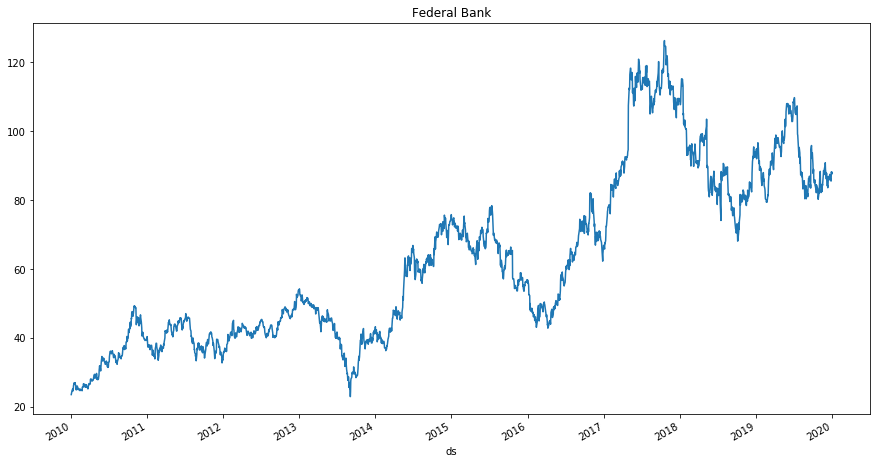

In [7]:
#prophet
stock_price.set_index('ds').y.plot(figsize=(15,8), title = 'Federal Bank')

### Prophet Model
#### To activate the Prophet Model, call Prophet() and assign it to a variable called model. Next fit our stock data to the model by calling the fit method.

In [8]:
model = Prophet()
model.fit(stock_price)

#### For the creation of future dates, we used a helper function in prophet called make_future_dataframe with the forecasting period of 365 days. 
#### Stocks are traded only in weekdays. So, we need to remove the weekends for that we used Boolean expression. 
#### The Boolean expression stating that Monday is 0 and Saturday is 5 and if a day is not equal to 0-4 then return as false.

In [9]:
future = model.make_future_dataframe(365, freq='d')

future_boolean = future['ds'].map(lambda x : True if x.weekday() in range(0, 5) else False)
future = future[future_boolean] 

future.tail()

,ds
2819,2020-12-24
2820,2020-12-25
2823,2020-12-28
2824,2020-12-29
2825,2020-12-30


In [10]:
forecast = model.predict(future)

In [11]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2717,2020-12-24,76.49,54.81,98.53,56.42,96.76,0.53,0.53,0.53,0.52,0.52,0.52,0.01,0.01,0.01,0.00,0.00,0.00,77.02
2718,2020-12-25,76.47,55.85,99.09,56.34,96.94,0.44,0.44,0.44,0.41,0.41,0.41,0.04,0.04,0.04,0.00,0.00,0.00,76.92
2719,2020-12-28,76.41,57.31,99.23,56.01,97.27,0.56,0.56,0.56,0.41,0.41,0.41,0.14,0.14,0.14,0.00,0.00,0.00,76.97
2720,2020-12-29,76.39,55.91,98.37,55.92,97.35,0.69,0.69,0.69,0.50,0.50,0.50,0.19,0.19,0.19,0.00,0.00,0.00,77.08
2721,2020-12-30,76.37,53.81,99.71,55.82,97.43,0.61,0.61,0.61,0.37,0.37,0.37,0.23,0.23,0.23,0.00,0.00,0.00,76.98


In [12]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-04,25.37,18.41,34.04,25.37,25.37,0.82,0.82,0.82,0.41,0.41,0.41,0.41,0.41,0.41,0.00,0.00,0.00,26.19
1,2010-01-05,25.41,18.70,34.51,25.41,25.41,0.93,0.93,0.93,0.50,0.50,0.50,0.42,0.42,0.42,0.00,0.00,0.00,26.34
2,2010-01-06,25.45,18.17,34.07,25.45,25.45,0.80,0.80,0.80,0.37,0.37,0.37,0.43,0.43,0.43,0.00,0.00,0.00,26.26
3,2010-01-07,25.50,18.56,33.68,25.50,25.50,0.94,0.94,0.94,0.52,0.52,0.52,0.42,0.42,0.42,0.00,0.00,0.00,26.44
4,2010-01-08,25.54,18.71,33.84,25.54,25.54,0.81,0.81,0.81,0.41,0.41,0.41,0.40,0.40,0.40,0.00,0.00,0.00,26.35


### Visualization of Forecast
#### Prophet has a plotting mechanism called plot.  
#### This plot functionality draws the original data (black dots), the model (blue line) and the error of the forecast (shaded blue area).

<Figure size 1152x432 with 0 Axes>

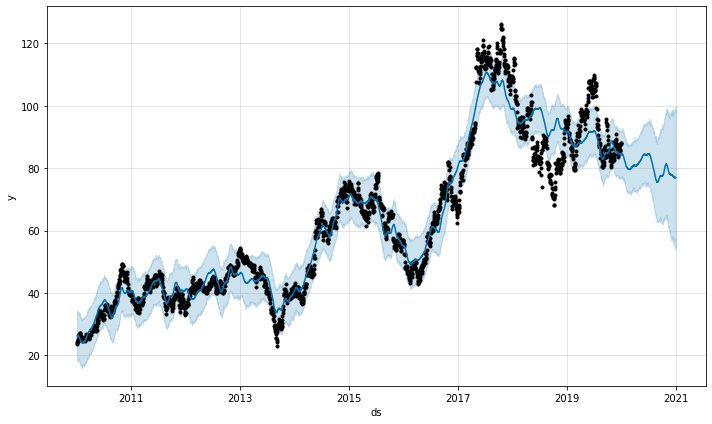

In [13]:
plt.figure(figsize=(16,6))
model.plot(forecast);

### Forecasting Components
#### Prophet take at the components of our model, including the holidays. 
#### This component plot is an important plot including the trend and seasonality (identified in the yearly pane).

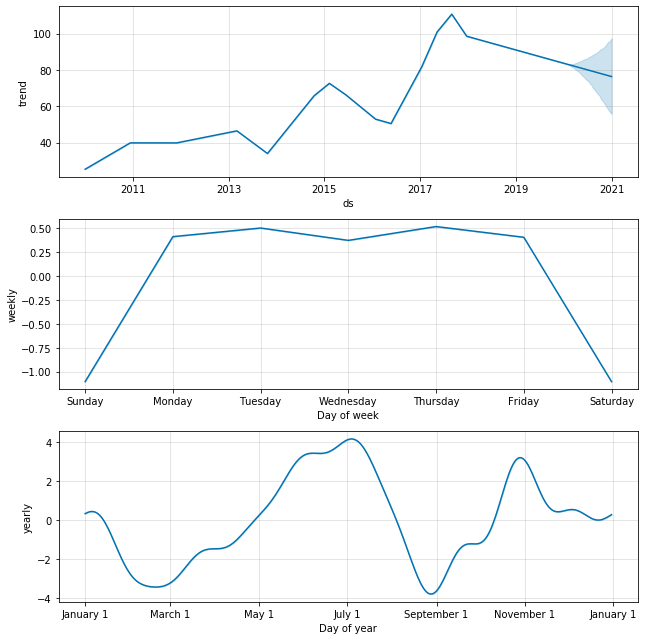

In [14]:
model.plot_components(forecast);

### Forecasting Graph

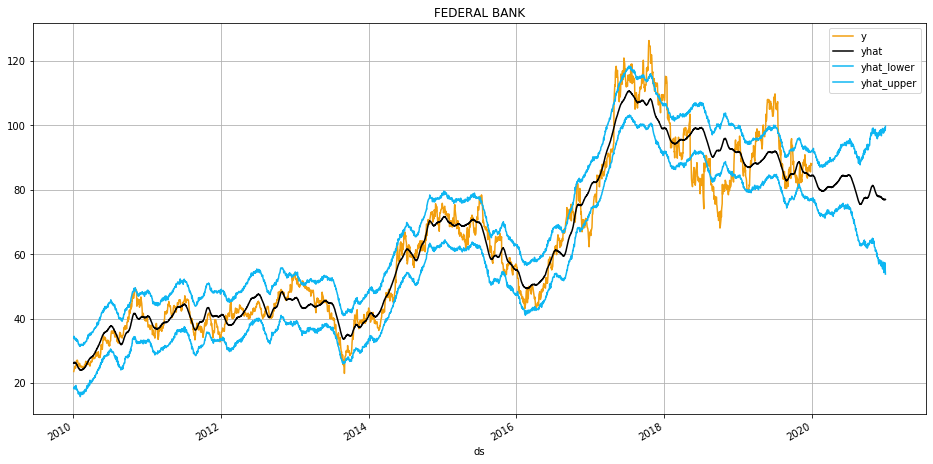

In [15]:
stock_price_forecast = forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']]
df = pd.merge(stock_price, stock_price_forecast, on='ds', how='right')
df.set_index('ds').plot(figsize=(16,8), title= 'FEDERAL BANK',color=['#F29F0E', "#000000", "#0EB6F2", "#0EB6F2"], grid=True);

In [16]:
stock_price_forecast.head()

,ds,yhat,yhat_lower,yhat_upper
0,2010-01-04,26.19,18.41,34.04
1,2010-01-05,26.34,18.70,34.51
2,2010-01-06,26.26,18.17,34.07
3,2010-01-07,26.44,18.56,33.68
4,2010-01-08,26.35,18.71,33.84


In [17]:
metric_stock_price = forecast.set_index('ds')[['yhat']].join(stock_price.set_index('ds').y).reset_index()
metric_stock_price.dropna(inplace=True)
metric_stock_price.tail()

,ds,yhat,y
2456,2019-12-24,84.35,85.65
2457,2019-12-26,84.37,85.55
2458,2019-12-27,84.27,88.20
2459,2019-12-30,84.34,87.60
2460,2019-12-31,84.45,88.05


### Forecast Validation

In [18]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(metric_stock_price.y,metric_stock_price.yhat))
print('Mean Squared Error:',mean_squared_error(metric_stock_price.y,metric_stock_price.yhat))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(metric_stock_price.y,metric_stock_price.yhat)))

Mean Absolute Error: 4.261437592532773
Mean Squared Error: 34.566624952913465
Root Mean Squared Error: 5.879338819366805


#### In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors. The MSE is a measure of the quality of an estimator. it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.
#### Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily close price in the test set within portion of the real close price.

# 2.ICICI Bank

In [19]:
#imports
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
from functools import reduce

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import logging, sys
logging.disable(sys.maxsize)
 

pd.options.display.float_format = "{:,.2f}".format

In [20]:
stock_price =  pd.read_csv('D:\Dataset\ICICIBANK.BO.csv',parse_dates=['Date'])

In [21]:
stock_price.describe()

,Open,High,Low,Close,Adj Close,Volume
count,"2,461.00","2,461.00","2,461.00","2,461.00","2,461.00","2,461.00"
mean,247.93,251.01,244.56,247.71,214.94,"1,877,133.11"
std,80.19,80.97,79.41,80.23,102.38,"1,647,837.21"
min,120.20,121.75,116.54,118.62,74.04,0.00
25%,187.27,189.64,184.54,186.87,120.04,"813,476.00"
50%,230.91,233.64,227.51,230.77,216.70,"1,418,901.00"
75%,292.55,294.90,288.80,291.70,282.17,"2,453,744.00"
max,549.40,552.40,542.80,549.40,549.40,"30,992,542.00"


In [22]:
stock_price = stock_price[['Date','Close']]

In [23]:
stock_price.columns = ['ds', 'y']
stock_price.head(10)

,ds,y
0,2010-01-04,159.80
1,2010-01-05,161.37
2,2010-01-06,162.76
3,2010-01-07,160.96
4,2010-01-08,158.87
5,2010-01-11,158.00
6,2010-01-12,153.13
7,2010-01-13,152.71
8,2010-01-14,151.93
9,2010-01-15,152.94


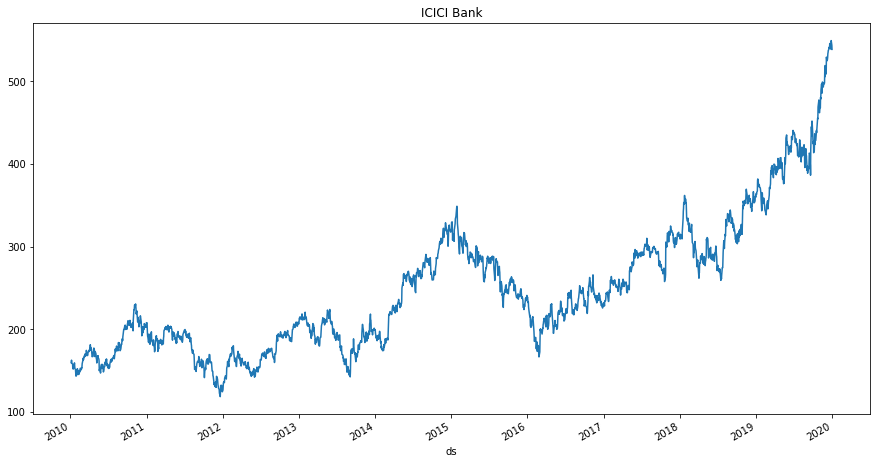

In [24]:
#prophet
stock_price.set_index('ds').y.plot(figsize=(15,8), title = 'ICICI Bank')

In [25]:
model = Prophet()
model.fit(stock_price)

In [26]:
future = model.make_future_dataframe(365, freq='d')

future_boolean = future['ds'].map(lambda x : True if x.weekday() in range(0, 5) else False)
future = future[future_boolean] 

future.tail()

,ds
2819,2020-12-24
2820,2020-12-25
2823,2020-12-28
2824,2020-12-29
2825,2020-12-30


In [27]:
forecast = model.predict(future)

In [28]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2717,2020-12-24,551.90,500.11,630.51,493.45,615.67,9.49,9.49,9.49,-0.51,-0.51,-0.51,10.00,10.00,10.00,0.00,0.00,0.00,561.39
2718,2020-12-25,552.15,500.37,630.03,493.52,616.32,8.54,8.54,8.54,-0.94,-0.94,-0.94,9.48,9.48,9.48,0.00,0.00,0.00,560.69
2719,2020-12-28,552.90,496.01,628.13,493.38,618.06,7.18,7.18,7.18,-0.74,-0.74,-0.74,7.91,7.91,7.91,0.00,0.00,0.00,560.08
2720,2020-12-29,553.15,493.20,629.40,493.28,618.71,6.92,6.92,6.92,-0.49,-0.49,-0.49,7.41,7.41,7.41,0.00,0.00,0.00,560.07
2721,2020-12-30,553.40,496.51,629.91,493.18,619.26,6.05,6.05,6.05,-0.88,-0.88,-0.88,6.93,6.93,6.93,0.00,0.00,0.00,559.44


In [29]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-04,154.96,138.52,181.93,154.96,154.96,4.37,4.37,4.37,-0.74,-0.74,-0.74,5.11,5.11,5.11,0.00,0.00,0.00,159.33
1,2010-01-05,155.08,137.19,181.18,155.08,155.08,4.36,4.36,4.36,-0.49,-0.49,-0.49,4.85,4.85,4.85,0.00,0.00,0.00,159.44
2,2010-01-06,155.21,135.85,181.09,155.21,155.21,3.75,3.75,3.75,-0.88,-0.88,-0.88,4.64,4.64,4.64,0.00,0.00,0.00,158.96
3,2010-01-07,155.33,137.69,183.28,155.33,155.33,3.97,3.97,3.97,-0.51,-0.51,-0.51,4.47,4.47,4.47,0.00,0.00,0.00,159.30
4,2010-01-08,155.46,136.95,181.04,155.46,155.46,3.42,3.42,3.42,-0.94,-0.94,-0.94,4.36,4.36,4.36,0.00,0.00,0.00,158.87


<Figure size 1152x432 with 0 Axes>

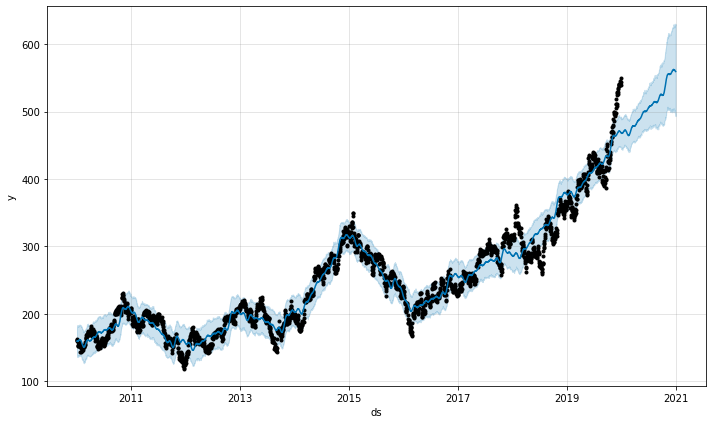

In [30]:
plt.figure(figsize=(16,6))
model.plot(forecast);

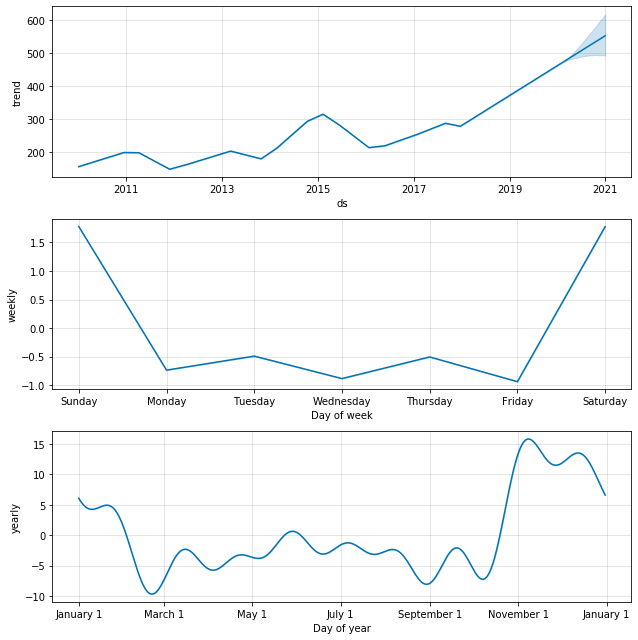

In [31]:
model.plot_components(forecast);

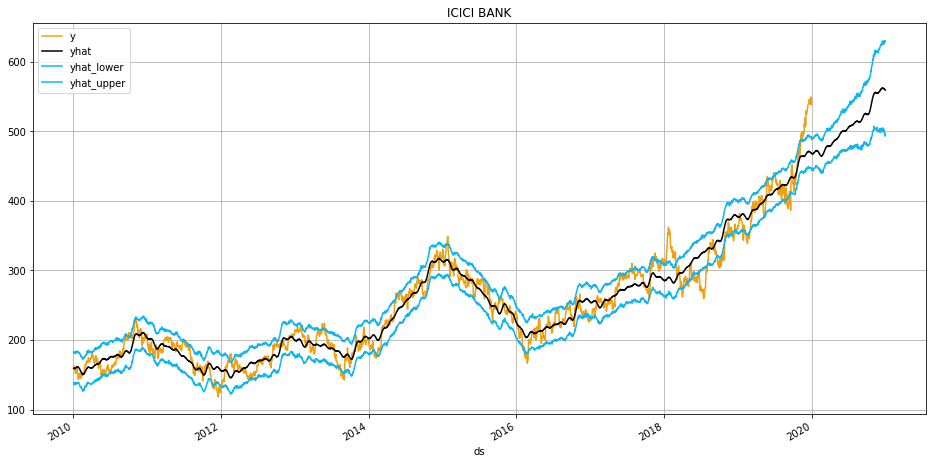

In [32]:
stock_price_forecast = forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']]
df = pd.merge(stock_price, stock_price_forecast, on='ds', how='right')
df.set_index('ds').plot(figsize=(16,8),title= 'ICICI BANK', color=['#F29F0E', "#000000", "#0EB6F2", "#0EB6F2"], grid=True);

In [33]:
stock_price_forecast.head()

,ds,yhat,yhat_lower,yhat_upper
0,2010-01-04,159.33,138.52,181.93
1,2010-01-05,159.44,137.19,181.18
2,2010-01-06,158.96,135.85,181.09
3,2010-01-07,159.30,137.69,183.28
4,2010-01-08,158.87,136.95,181.04


In [34]:
metric_stock_price = forecast.set_index('ds')[['yhat']].join(stock_price.set_index('ds').y).reset_index()
metric_stock_price.dropna(inplace=True)
metric_stock_price.tail()

,ds,yhat,y
2456,2019-12-24,470.43,541.05
2457,2019-12-26,469.89,539.00
2458,2019-12-27,469.18,549.40
2459,2019-12-30,468.60,543.95
2460,2019-12-31,468.62,538.75


In [35]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(metric_stock_price.y,metric_stock_price.yhat))
print('Mean Squared Error:',mean_squared_error(metric_stock_price.y,metric_stock_price.yhat))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(metric_stock_price.y,metric_stock_price.yhat)))

Mean Absolute Error: 13.422718757084994
Mean Squared Error: 312.7684667503777
Root Mean Squared Error: 17.685261285895034


## 3.Canara Bank

In [36]:
#imports
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
from functools import reduce

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import logging, sys
logging.disable(sys.maxsize)
 

pd.options.display.float_format = "{:,.2f}".format

In [37]:
stock_price =  pd.read_csv('D:\Dataset\CANBK.BO.csv',parse_dates=['Date'])

In [38]:
stock_price.describe()

,Open,High,Low,Close,Adj Close,Volume
count,"2,461.00","2,461.00","2,461.00","2,461.00","2,461.00","2,461.00"
mean,349.86,355.88,343.05,349.21,324.03,"243,974.63"
std,114.22,116.06,112.17,114.20,89.51,"234,006.16"
min,154.07,159.52,151.93,154.22,153.78,0.00
25%,261.55,265.55,255.50,260.30,257.47,"81,561.00"
50%,342.19,347.98,336.00,340.50,319.47,"186,427.00"
75%,416.06,422.48,407.11,415.62,376.09,"327,432.00"
max,813.16,820.94,790.98,813.01,692.66,"2,654,966.00"


In [39]:
stock_price = stock_price[['Date','Close']]

In [40]:
stock_price.columns = ['ds', 'y']
stock_price.head(10)

,ds,y
0,2010-01-04,387.08
1,2010-01-05,394.71
2,2010-01-06,396.27
3,2010-01-07,399.96
4,2010-01-08,393.11
5,2010-01-11,395.34
6,2010-01-12,389.17
7,2010-01-13,384.16
8,2010-01-14,382.75
9,2010-01-15,374.63


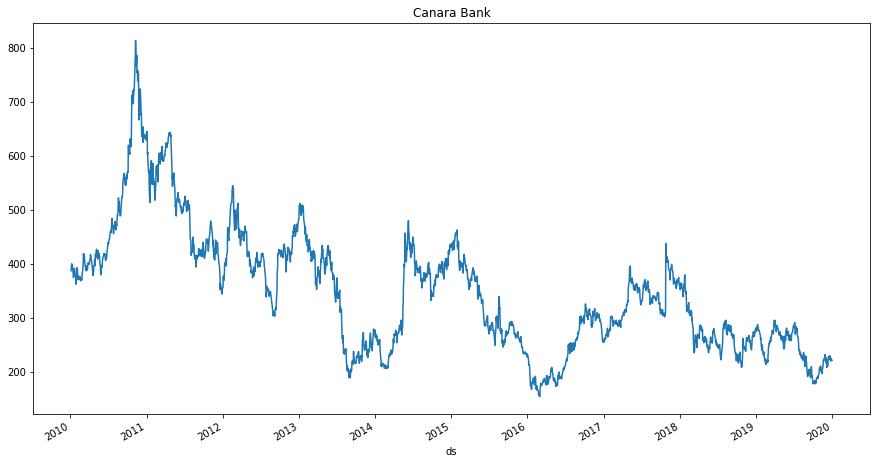

In [41]:
#prophet
stock_price.set_index('ds').y.plot(figsize=(15,8), title = 'Canara Bank')

In [42]:
model = Prophet()
model.fit(stock_price)

In [43]:
future = model.make_future_dataframe(365, freq='d')

future_boolean = future['ds'].map(lambda x : True if x.weekday() in range(0, 5) else False)
future = future[future_boolean] 

future.tail()

,ds
2819,2020-12-24
2820,2020-12-25
2823,2020-12-28
2824,2020-12-29
2825,2020-12-30


In [44]:
forecast = model.predict(future)

In [45]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2717,2020-12-24,152.07,2.32,296.10,3.93,284.92,2.96,2.96,2.96,-8.29,-8.29,-8.29,11.25,11.25,11.25,0.00,0.00,0.00,155.04
2718,2020-12-25,151.91,6.99,288.63,3.32,285.54,2.11,2.11,2.11,-9.12,-9.12,-9.12,11.23,11.23,11.23,0.00,0.00,0.00,154.02
2719,2020-12-28,151.42,9.61,298.01,0.58,287.38,3.40,3.40,3.40,-8.08,-8.08,-8.08,11.49,11.49,11.49,0.00,0.00,0.00,154.83
2720,2020-12-29,151.26,0.34,294.41,-0.65,287.45,3.34,3.34,3.34,-8.33,-8.33,-8.33,11.67,11.67,11.67,0.00,0.00,0.00,154.61
2721,2020-12-30,151.10,-3.76,294.52,-1.85,287.38,3.23,3.23,3.23,-8.67,-8.67,-8.67,11.90,11.90,11.90,0.00,0.00,0.00,154.33


In [46]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-04,339.55,298.88,391.25,339.55,339.55,5.30,5.30,5.30,-8.08,-8.08,-8.08,13.38,13.38,13.38,0.00,0.00,0.00,344.85
1,2010-01-05,340.43,302.36,395.53,340.43,340.43,5.40,5.40,5.40,-8.33,-8.33,-8.33,13.73,13.73,13.73,0.00,0.00,0.00,345.83
2,2010-01-06,341.30,297.54,391.48,341.30,341.30,5.39,5.39,5.39,-8.67,-8.67,-8.67,14.06,14.06,14.06,0.00,0.00,0.00,346.69
3,2010-01-07,342.18,300.57,397.16,342.18,342.18,6.09,6.09,6.09,-8.29,-8.29,-8.29,14.38,14.38,14.38,0.00,0.00,0.00,348.27
4,2010-01-08,343.05,299.52,398.01,343.05,343.05,5.55,5.55,5.55,-9.12,-9.12,-9.12,14.67,14.67,14.67,0.00,0.00,0.00,348.60


<Figure size 1152x432 with 0 Axes>

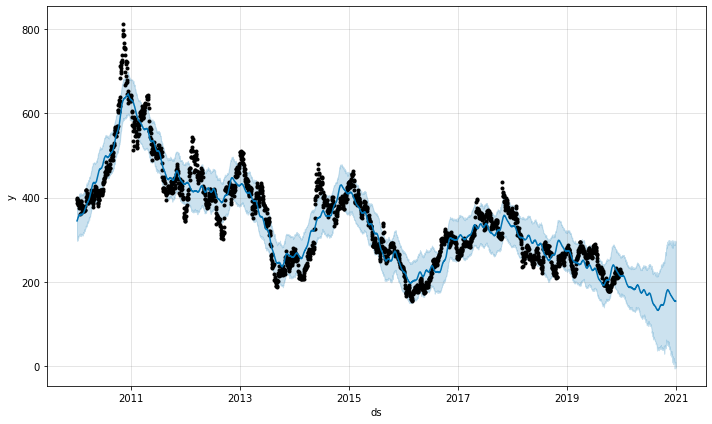

In [47]:
plt.figure(figsize=(16,6))
model.plot(forecast);

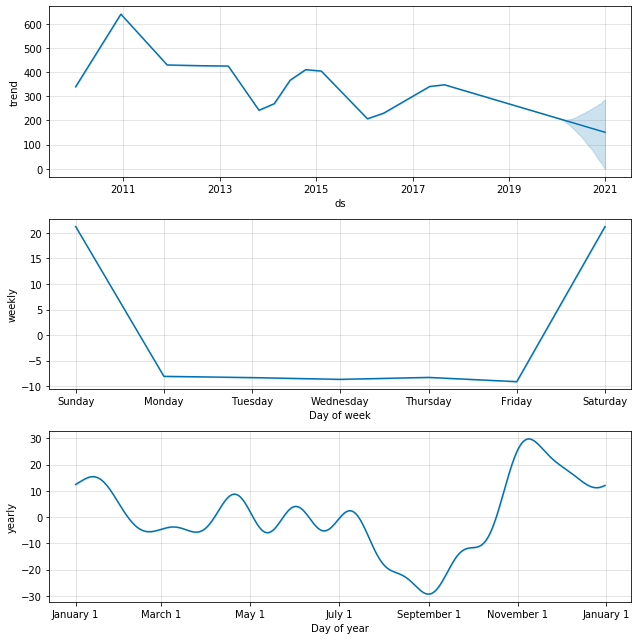

In [48]:
model.plot_components(forecast);

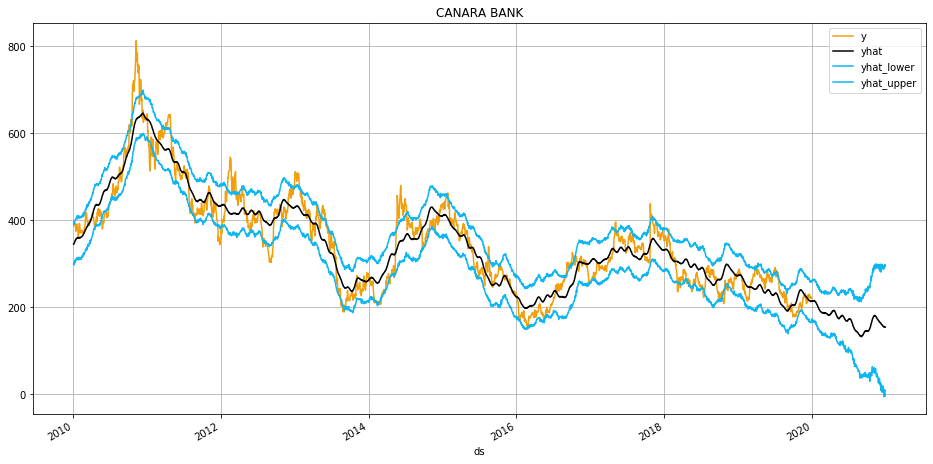

In [49]:
stock_price_forecast = forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']]
df = pd.merge(stock_price, stock_price_forecast, on='ds', how='right')
df.set_index('ds').plot(figsize=(16,8),title= 'CANARA BANK', color=['#F29F0E', "#000000", "#0EB6F2", "#0EB6F2"], grid=True);

In [50]:
stock_price_forecast.head()

,ds,yhat,yhat_lower,yhat_upper
0,2010-01-04,344.85,298.88,391.25
1,2010-01-05,345.83,302.36,395.53
2,2010-01-06,346.69,297.54,391.48
3,2010-01-07,348.27,300.57,397.16
4,2010-01-08,348.60,299.52,398.01


In [51]:
metric_stock_price = forecast.set_index('ds')[['yhat']].join(stock_price.set_index('ds').y).reset_index()
metric_stock_price.dropna(inplace=True)
metric_stock_price.tail()

,ds,yhat,y
2456,2019-12-24,214.18,225.80
2457,2019-12-26,213.82,220.30
2458,2019-12-27,212.88,224.20
2459,2019-12-30,213.87,221.70
2460,2019-12-31,213.71,221.30


In [52]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(metric_stock_price.y,metric_stock_price.yhat))
print('Mean Squared Error:',mean_squared_error(metric_stock_price.y,metric_stock_price.yhat))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(metric_stock_price.y,metric_stock_price.yhat)))

Mean Absolute Error: 29.62579450309121
Mean Squared Error: 1364.4655818650347
Root Mean Squared Error: 36.93867325534357


## 4.Axis Bank

In [53]:
#imports
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
from functools import reduce

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import logging, sys
logging.disable(sys.maxsize)
 

pd.options.display.float_format = "{:,.2f}".format

In [54]:
stock_price =  pd.read_csv('D:\Dataset\AXISBANK.BO.csv',parse_dates=['Date'])

In [55]:
stock_price.describe()

,Open,High,Low,Close,Adj Close,Volume
count,"2,461.00","2,461.00","2,461.00","2,461.00","2,461.00","2,461.00"
mean,414.67,419.94,408.66,414.12,386.24,"1,048,775.41"
std,170.75,172.39,168.58,170.37,193.26,"6,026,168.80"
min,156.54,163.00,152.80,156.53,119.16,0.00
25%,250.26,253.79,246.60,250.06,191.13,"397,128.00"
50%,420.55,425.00,415.25,420.00,410.71,"642,745.00"
75%,542.00,549.00,534.50,541.30,536.14,"1,081,155.00"
max,826.55,826.55,811.90,821.40,820.38,"263,413,195.00"


In [56]:
stock_price = stock_price[['Date','Close']]

In [57]:
stock_price.columns = ['ds', 'y']
stock_price.head(10)

,ds,y
0,2010-01-04,198.61
1,2010-01-05,202.00
2,2010-01-06,199.06
3,2010-01-07,200.59
4,2010-01-08,202.71
5,2010-01-11,210.22
6,2010-01-12,209.82
7,2010-01-13,207.89
8,2010-01-14,212.41
9,2010-01-15,215.64


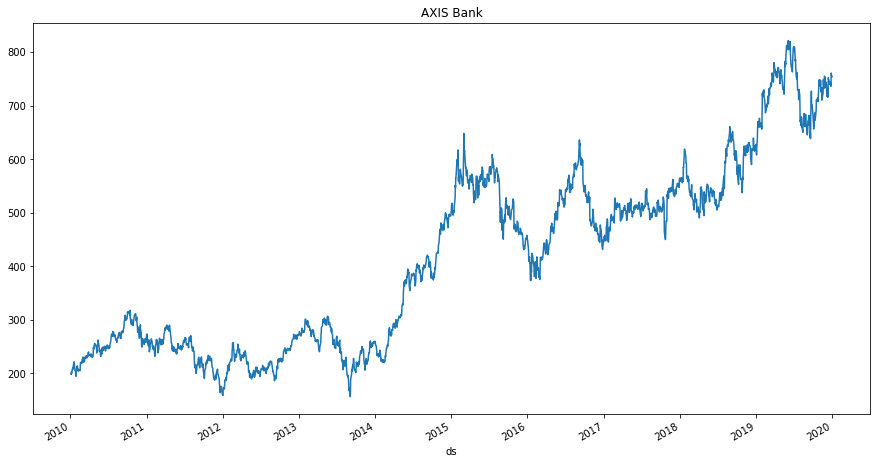

In [58]:
#prophet
stock_price.set_index('ds').y.plot(figsize=(15,8), title = 'AXIS Bank')

In [59]:
model = Prophet()
model.fit(stock_price)

In [60]:
future = model.make_future_dataframe(365, freq='d')

future_boolean = future['ds'].map(lambda x : True if x.weekday() in range(0, 5) else False)
future = future[future_boolean] 

future.tail()

,ds
2819,2020-12-24
2820,2020-12-25
2823,2020-12-28
2824,2020-12-29
2825,2020-12-30


In [61]:
forecast = model.predict(future)

In [62]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2717,2020-12-24,892.55,779.02,"1,000.87",790.81,"1,002.07",-12.17,-12.17,-12.17,2.22,2.22,2.22,-14.39,-14.39,-14.39,0.00,0.00,0.00,880.38
2718,2020-12-25,892.89,774.65,998.65,790.72,"1,002.48",-12.69,-12.69,-12.69,1.82,1.82,1.82,-14.51,-14.51,-14.51,0.00,0.00,0.00,880.20
2719,2020-12-28,893.91,774.57,999.62,790.51,"1,005.13",-12.60,-12.60,-12.60,2.06,2.06,2.06,-14.65,-14.65,-14.65,0.00,0.00,0.00,881.31
2720,2020-12-29,894.25,773.04,991.63,790.47,"1,005.93",-12.10,-12.10,-12.10,2.50,2.50,2.50,-14.61,-14.61,-14.61,0.00,0.00,0.00,882.15
2721,2020-12-30,894.59,771.96,999.59,790.29,"1,006.72",-13.53,-13.53,-13.53,0.98,0.98,0.98,-14.50,-14.50,-14.50,0.00,0.00,0.00,881.06


In [63]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-04,206.39,159.51,234.40,206.39,206.39,-11.14,-11.14,-11.14,2.06,2.06,2.06,-13.19,-13.19,-13.19,0.00,0.00,0.00,195.25
1,2010-01-05,206.66,158.20,239.29,206.66,206.66,-10.23,-10.23,-10.23,2.50,2.50,2.50,-12.73,-12.73,-12.73,0.00,0.00,0.00,196.43
2,2010-01-06,206.93,157.97,236.02,206.93,206.93,-11.24,-11.24,-11.24,0.98,0.98,0.98,-12.21,-12.21,-12.21,0.00,0.00,0.00,195.69
3,2010-01-07,207.20,157.34,237.21,207.20,207.20,-9.42,-9.42,-9.42,2.22,2.22,2.22,-11.63,-11.63,-11.63,0.00,0.00,0.00,197.78
4,2010-01-08,207.47,157.92,238.27,207.47,207.47,-9.17,-9.17,-9.17,1.82,1.82,1.82,-10.99,-10.99,-10.99,0.00,0.00,0.00,198.30


In [64]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-04,206.39,159.51,234.40,206.39,206.39,-11.14,-11.14,-11.14,2.06,2.06,2.06,-13.19,-13.19,-13.19,0.00,0.00,0.00,195.25
1,2010-01-05,206.66,158.20,239.29,206.66,206.66,-10.23,-10.23,-10.23,2.50,2.50,2.50,-12.73,-12.73,-12.73,0.00,0.00,0.00,196.43
2,2010-01-06,206.93,157.97,236.02,206.93,206.93,-11.24,-11.24,-11.24,0.98,0.98,0.98,-12.21,-12.21,-12.21,0.00,0.00,0.00,195.69
3,2010-01-07,207.20,157.34,237.21,207.20,207.20,-9.42,-9.42,-9.42,2.22,2.22,2.22,-11.63,-11.63,-11.63,0.00,0.00,0.00,197.78
4,2010-01-08,207.47,157.92,238.27,207.47,207.47,-9.17,-9.17,-9.17,1.82,1.82,1.82,-10.99,-10.99,-10.99,0.00,0.00,0.00,198.30


<Figure size 1152x432 with 0 Axes>

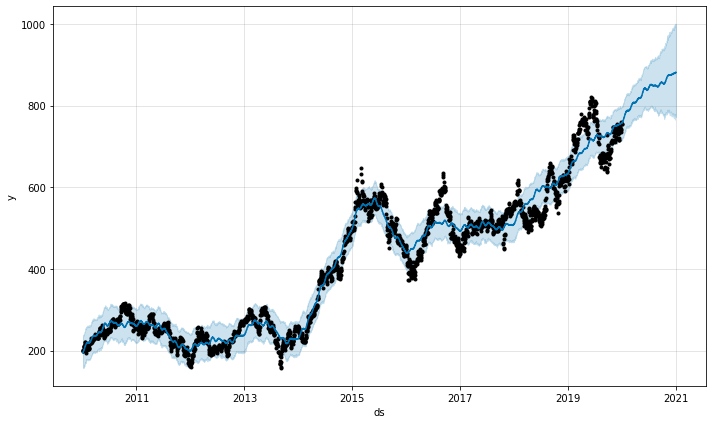

In [65]:
plt.figure(figsize=(16,6))
model.plot(forecast);

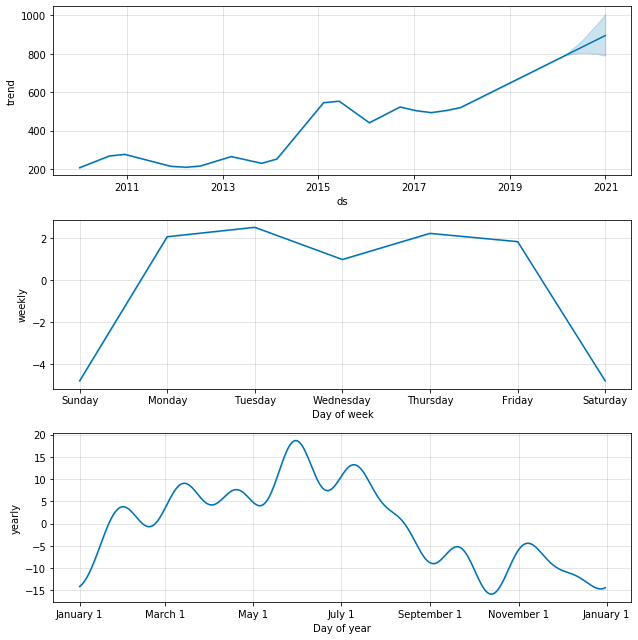

In [66]:
model.plot_components(forecast);

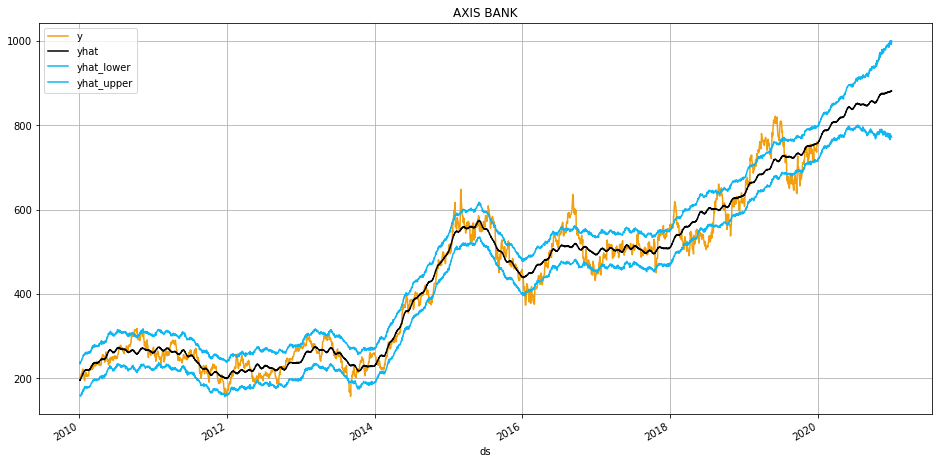

In [67]:
stock_price_forecast = forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']]
df = pd.merge(stock_price, stock_price_forecast, on='ds', how='right')
df.set_index('ds').plot(figsize=(16,8), title = 'AXIS BANK',color=['#F29F0E', "#000000", "#0EB6F2", "#0EB6F2"], grid=True);

In [68]:
stock_price_forecast.head()

,ds,yhat,yhat_lower,yhat_upper
0,2010-01-04,195.25,159.51,234.40
1,2010-01-05,196.43,158.20,239.29
2,2010-01-06,195.69,157.97,236.02
3,2010-01-07,197.78,157.34,237.21
4,2010-01-08,198.30,157.92,238.27


In [69]:
metric_stock_price = forecast.set_index('ds')[['yhat']].join(stock_price.set_index('ds').y).reset_index()
metric_stock_price.dropna(inplace=True)
metric_stock_price.tail()

,ds,yhat,y
2456,2019-12-24,756.52,740.45
2457,2019-12-26,756.64,736.15
2458,2019-12-27,756.51,760.70
2459,2019-12-30,757.80,754.20
2460,2019-12-31,758.70,754.00


In [70]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(metric_stock_price.y,metric_stock_price.yhat))
print('Mean Squared Error:',mean_squared_error(metric_stock_price.y,metric_stock_price.yhat))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(metric_stock_price.y,metric_stock_price.yhat)))

Mean Absolute Error: 23.84139140625334
Mean Squared Error: 996.300804425197
Root Mean Squared Error: 31.5642329928227
